# Tarea 1 Machine Learning - Métodos Lineales para Regresión

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

## 5. Detectar enfermedades cardíacas

El dataset contiene 13 atributos en lugar de las 75 que se consideran en el dataset original.  
Estas corresponden a:  

-- 1. age       
-- 2. sex       
-- 3. chest pain type  (4 values)       
-- 4. resting blood pressure  
-- 5. serum cholestoral in mg/dl      
-- 6. fasting blood sugar > 120 mg/dl       
-- 7. resting electrocardiographic results  (values 0,1,2) 
-- 8. maximum heart rate achieved  
-- 9. exercise induced angina    
-- 10. oldpeak = ST depression induced by exercise relative to rest   
-- 11. the slope of the peak exercise ST segment     
-- 12. number of major vessels (0-3) colored by flourosopy        
-- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect   

Y el último atributo, 'normal', que es 1=sano y 2=enfermo para dicho paciente.

#### a. Cargar el dataset

In [1]:
import pandas as pd

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', \
               'angina','oldpeak','slope','vessel','thal','normal']

df = pd.read_csv('heart.dat', header=None, names=headers, sep=' ')

df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


Se observa la serie de datos 'max_heart' con un boxplot para conocer cómo está distribuida y para identificar outliers.

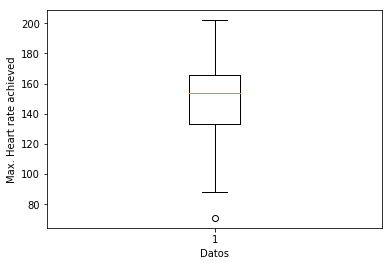

In [2]:
import matplotlib.pyplot as plt

plt.clf()

plt.boxplot(list(df['max_heart']))
plt.xlabel('Datos')
plt.ylabel('Max. Heart rate achieved')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.clf()

plt.boxplot(list(df['max_heart']))
plt.xlabel('Datos')
plt.ylabel('Max. Heart rate achieved')

plt.show()

Los outliers son aquellos puntos $x = max\_heart$ fuera del rango abarcado por los bigotes, lo que es igual a estar fuera del intervalo $[\bar{x}-2.698\sigma, \bar{x}+2.698\sigma]$ en una distribución normal. Estadísticamente, se espera que el $0.71\%$ de los pacientes queden fuera del rango y sean outliers. Dada la baja cantidad de datos disponibles, se decide relajar la condición para considerarse outlier a aquellos puntos $x$ fuera del intervalo $[\bar{x}-2\sigma, \bar{x}+2\sigma]$, con lo que se espera que el $4.56\%$ de los pacientes observados sean atípicos y posibles enfermos cardíacos. Notar que esta decisión se basa únicamente en el hecho de que $max\_heart$ sea un atípico de acuerdo al criterio definido, el cual incluye tanto pacientes con un muy alto ritmo cardíaco como a los con uno muy bajo.

In [3]:
def categorizar(vector_continuo):
    vector_clasificaciones = []
    for x in list(vector_continuo):
        if x < np.mean(vector_continuo) - 2*np.std(vector_continuo):
            vector_clasificaciones.append(1)
        elif x > np.mean(vector_continuo) + 2*np.std(vector_continuo):
            vector_clasificaciones.append(1)
        else:
            vector_clasificaciones.append(0)
    return vector_clasificaciones

In [4]:
import numpy as np

cantidad_outliers = sum(categorizar(df['max_heart']))

print('Cantidad outliers bajo nuevo criterio:',cantidad_outliers)

('Cantidad outliers bajo nuevo criterio:', 10)


De acuerdo al criterio establecido, a partir de los datos, serían 10 pacientes los catalogados como outliers, siendo considerados enfermos (anteriormente sólo existía uno; el único del boxplot anterior). Entonces, se debe aplicar el mismo criterio sobre el modelo de regresión lineal que se va a crear. La idea es que la salida del modelo sea transformada de una continua a una del tipo categórica, con las clases {1=enfermo, 0=sano}. Así, una predicción será correcta si tanto el max_heart predicho como el real resultan ser outliers de sus respectivas series de datos.

Escalado y estandarización de los atributos.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Creación de la matriz de datos de entrada $X$ (todos los atributos excepto 'max_heart') y vector de salidas esperadas $Y$ (columna 'max_heart').

In [6]:
X = df.drop('max_heart', 1)
Y = df['max_heart']

Creación del conjunto de entrenamiento $(X_{train}, Y_{train})$ y el conjunto de pruebas $(X_{test}, Y_{test})$ con el 70% y el 30% de los datos, respectivamente.

In [7]:
corte = int(0.7*len(X))

Xtrain = X[:corte]
Ytrain = Y[:corte]
Xtest = X[corte:]
Ytest = Y[corte:]

Categorización de los vectores $Y_{train}$ e $Y_{test}$.

In [8]:
Ytrain_categorical = categorizar(Ytrain)
Ytest_categorical = categorizar(Ytest)

#### b. Regresión lineal

Generar el modelo de regresión lineal usando $(X_{train}, Y_{train})$.

In [9]:
import sklearn.linear_model as lm

Xtrain.insert(Xtrain.shape[1], 'intercept', np.ones(Xtrain.shape[0]))
Xtest.insert(Xtest.shape[1], 'intercept', np.ones(Xtest.shape[0]))
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, Ytrain)
linreg.coef_.reshape((-1,1))

array([[ -9.96931906e-01],
       [ -1.98465621e+00],
       [ -2.34084053e+00],
       [  1.46459480e-01],
       [  3.04850425e-02],
       [  4.59663205e+00],
       [  5.92905711e-01],
       [ -9.92553889e+00],
       [ -1.25678660e+00],
       [ -8.20844117e+00],
       [ -4.79013456e-01],
       [  6.87534645e-01],
       [ -8.28228065e+00],
       [  2.09934680e+02]])

In [10]:
from sklearn.metrics import accuracy_score

yhat_train = linreg.predict(Xtrain)
yhat_test = linreg.predict(Xtest)

yhat_train_categorical = categorizar(yhat_train)
yhat_test_categorical = categorizar(yhat_test)


print("Training Score:",round((accuracy_score(Ytrain_categorical,yhat_train_categorical)),4))
print("Test Score: ",round((accuracy_score(Ytest_categorical,yhat_test_categorical)),4))

('Training Score:', 0.9524)
('Test Score: ', 0.9506)


En promedio, un $93\%$ de las predicciones resultaron correctas. Si se revisan los casos de enfermedad:

In [11]:
print('nº : y_true , y_pred')
for i in range(len(Ytrain_categorical)):
    if(Ytrain_categorical[i] == 1):
        print(i,':', Ytrain_categorical[i],',', yhat_train_categorical[i])

nº : y_true , y_pred
(57, ':', 1, ',', 0)
(101, ':', 1, ',', 0)
(122, ':', 1, ',', 0)
(126, ':', 1, ',', 0)
(133, ':', 1, ',', 1)
(145, ':', 1, ',', 0)


Sólo acertó a un caso, siendo el resto falsos negativos. Si se examinan los positivos de enfermedad predichos:

In [13]:
print('nº : y_true , y_pred')
for i in range(len(Ytrain_categorical)):
    if(yhat_train_categorical[i] == 1):
        print(i,':', Ytrain_categorical[i],',', yhat_train_categorical[i])

nº : y_true , y_pred
(20, ':', 0, ',', 1)
(133, ':', 1, ',', 1)
(138, ':', 0, ',', 1)
(172, ':', 0, ',', 1)
(174, ':', 0, ',', 1)


Siendo 4 los falsos positivos. Del conjunto de pruebas se hace el mismo análisis.

In [12]:
print('nº : y_true , y_pred')
for i in range(len(Ytest_categorical)):
    if(Ytest_categorical[i] == 1):
        print(i,':', Ytest_categorical[i],',', yhat_test_categorical[i])

nº : y_true , y_pred
(0, ':', 1, ',', 0)
(25, ':', 1, ',', 1)
(37, ':', 1, ',', 0)
(80, ':', 1, ',', 0)


Sólo se acerta a un caso, con 3 falsos negativos.

In [14]:
print('nº : y_true , y_pred')
for i in range(len(Ytest_categorical)):
    if(yhat_test_categorical[i] == 1):
        print(i,':', Ytest_categorical[i],',', yhat_test_categorical[i])

nº : y_true , y_pred
(2, ':', 0, ',', 1)
(25, ':', 1, ',', 1)


Habiendo sólo un falso positivo.

De los 10 casos de enfermedad, sólo se detectó 2 correctamente, existiendo 8 casos de falsos negativos. Además, el modelo de regresión diagnosicó como enfermos erróneamente a 5 pacientes, por lo que hubo 5 falsos positivos. El $93\%$ de precisión obtenido anteriormente es, por lo tanto, una métrica engañosa.


### (discutir resultado y proponer otro método)